## Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. The elbow technique
#### 5. k-means clustering

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [5]:
# This option ensures the graphs are displayed in the notebook without needing to "call" them specifically
%matplotlib inline

In [6]:
# Define path
path = r'C:\Users\16307\Desktop\Tasks - DA Immersion\Gun Violence Analysis'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'gun_violence_cleaned3.csv'))

### 2. Data wrangling

In [9]:
columns = ["n_killed", "n_injured", "congressional_district", "n_guns_involved", "state_house_district", "state_senate_district",
          "average_age", "victim_count", "suspect_count", "male_count", "female_count", "child_count", "teen_count", "adult_count",
          "pistol_count", "rifle_count", "shotgun_count", "unknown_gun_count"]

In [10]:
# Create a subset
subset_df = df[columns]

In [11]:
subset_df.head()

,n_killed,n_injured,congressional_district,n_guns_involved,state_house_district,state_senate_district,average_age,victim_count,suspect_count,male_count,female_count,child_count,teen_count,adult_count,pistol_count,rifle_count,shotgun_count,unknown_gun_count
0,0,4,14.0,NaN,NaN,NaN,20.00,4,1,3,1,0,0,5,0,0,0,0
1,1,3,43.0,NaN,62.0,35.0,20.00,4,1,1,0,0,0,4,0,0,0,0
2,1,3,9.0,2.0,56.0,13.0,31.20,3,2,5,0,0,0,5,0,0,0,2
3,4,0,6.0,NaN,40.0,28.0,37.75,3,1,3,1,0,0,4,0,0,0,0
4,2,2,6.0,2.0,62.0,27.0,31.25,3,1,2,2,0,1,3,2,0,0,0


In [12]:
subset_df.shape

(239677, 18)

### 3. Data cleaning

##### Missing values

In [15]:
# Check for missing values
subset_df.isnull().sum()

n_killed                      0
n_injured                     0
congressional_district    11944
n_guns_involved           99451
state_house_district      38772
state_senate_district     32335
average_age               93549
victim_count                  0
suspect_count                 0
male_count                    0
female_count                  0
child_count                   0
teen_count                    0
adult_count                   0
pistol_count                  0
rifle_count                   0
shotgun_count                 0
unknown_gun_count             0
dtype: int64

In [16]:
# Dropping columns
subset_df2 = subset_df.drop(['congressional_district', 'n_guns_involved', 'state_house_district', 'state_senate_district', 'average_age'], axis=1)

##### Duplicates check

In [18]:
dups = subset_df2.duplicated()
dups.shape # No dups

(239677,)

### 4. The elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [21]:
score = [kmeans[i].fit(subset_df2).score(subset_df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option

score

[-4420066.9954316085,
 -4046160.1642277674,
 -2072987.6252745534,
 -1644000.1915851445,
 -1379583.1218434372,
 -1418729.437034343,
 -1381698.7750788012,
 -1140120.9148529768,
 -1073416.3862735773]

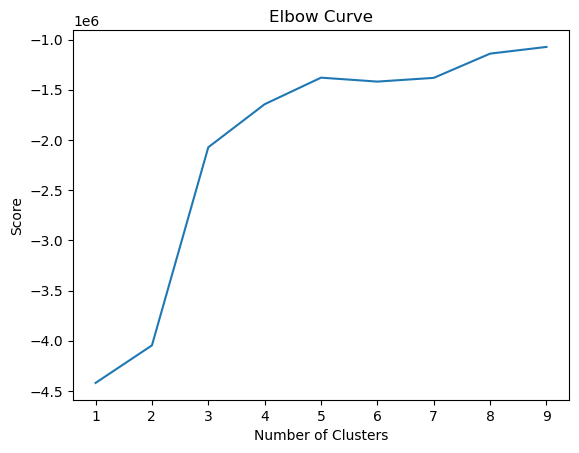

In [22]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Reasoning:**
I chose 5 clusters because the curve on the plot relatively straightens out after 5 on the x-axis.

### 5. k-means clustering

In [25]:
# Create the k-means object
kmeans = KMeans(n_clusters = 5) 

In [26]:
# Fit the k-means object to the data
kmeans.fit(subset_df2)

KMeans(n_clusters=5)

In [27]:
subset_df2['clusters'] = kmeans.fit_predict(subset_df2)

In [28]:
subset_df2.head()

,n_killed,n_injured,victim_count,suspect_count,male_count,female_count,child_count,teen_count,adult_count,pistol_count,rifle_count,shotgun_count,unknown_gun_count,clusters
0,0,4,4,1,3,1,0,0,5,0,0,0,0,0
1,1,3,4,1,1,0,0,0,4,0,0,0,0,0
2,1,3,3,2,5,0,0,0,5,0,0,0,2,0
3,4,0,3,1,3,1,0,0,4,0,0,0,0,0
4,2,2,3,1,2,2,0,1,3,2,0,0,0,0


In [29]:
subset_df2['clusters'].value_counts()

clusters
3    111715
2     99783
0     27842
4       316
1        21
Name: count, dtype: int64

In [30]:
subset_df2.columns

Index(['n_killed', 'n_injured', 'victim_count', 'suspect_count', 'male_count',
       'female_count', 'child_count', 'teen_count', 'adult_count',
       'pistol_count', 'rifle_count', 'shotgun_count', 'unknown_gun_count',
       'clusters'],
      dtype='object')

In [31]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df2)

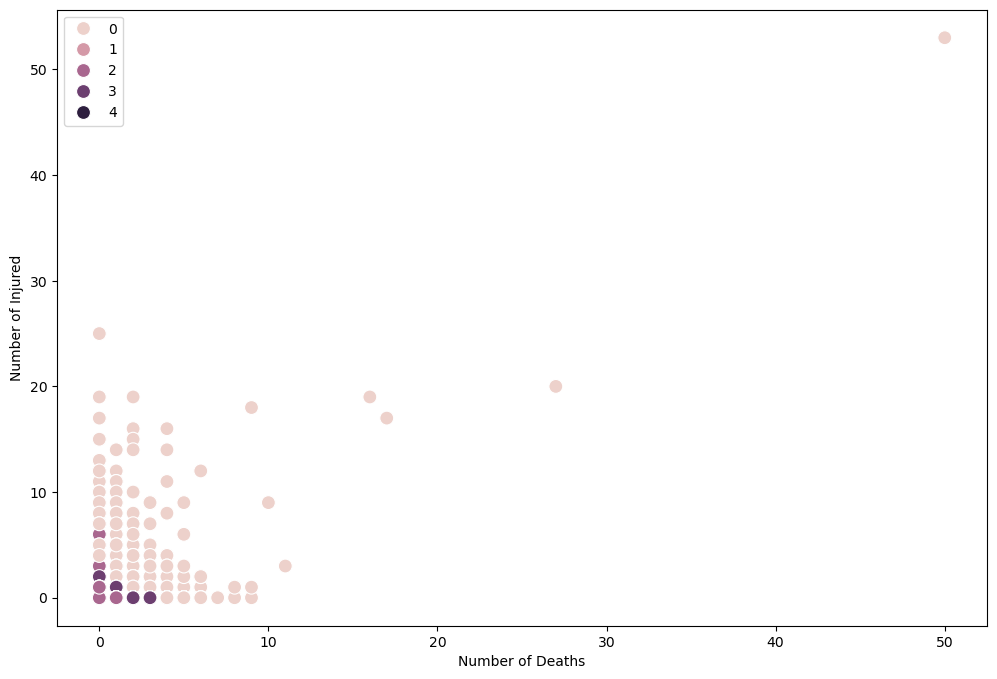

In [32]:
# Plot the clusters for the "n_killed" and "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['n_killed'], y=subset_df2['n_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Deaths') # Label x-axis.
plt.ylabel('Number of Injured') # Label y-axis.
plt.show()

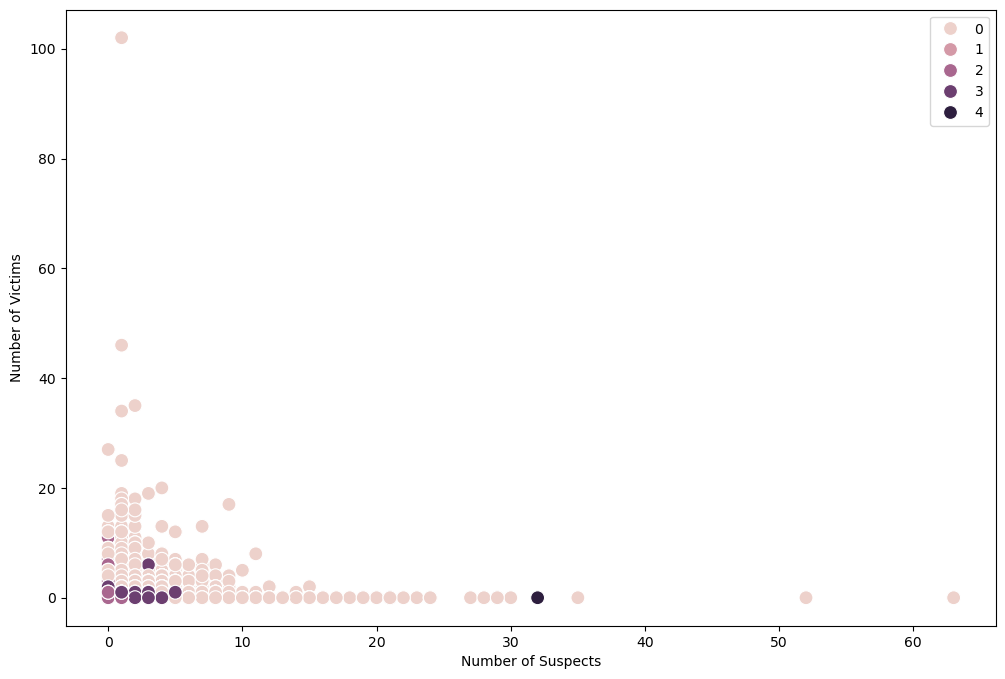

In [33]:
# Plot the clusters for the "victim_count" and "suspect_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['suspect_count'], y=subset_df2['victim_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Suspects') # Label x-axis.
plt.ylabel('Number of Victims') # Label y-axis.
plt.show()

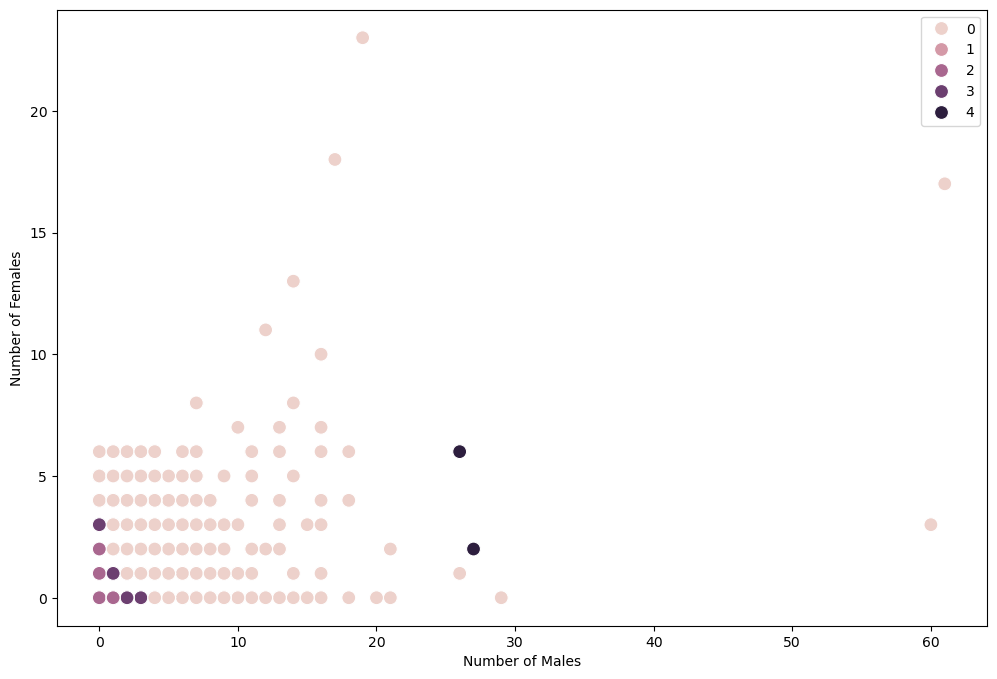

In [34]:
# Plot the clusters for the "male_count" and "female_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['male_count'], y=subset_df2['female_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Males') # Label x-axis.
plt.ylabel('Number of Females') # Label y-axis.
plt.show()

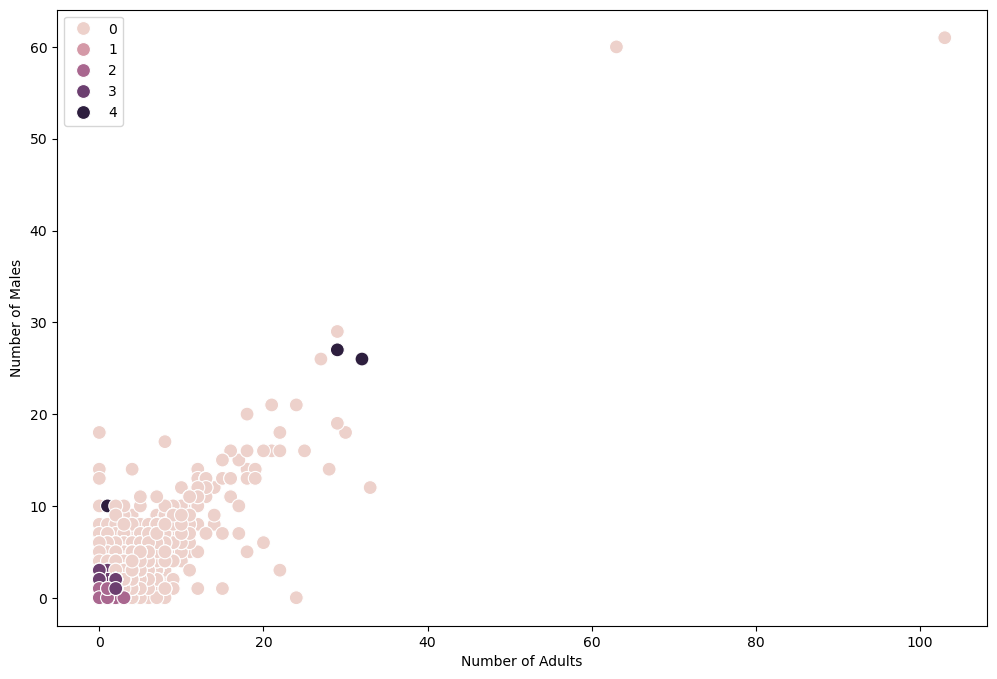

In [35]:
# Plot the clusters for the "adult_count" and "male_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['adult_count'], y=subset_df2['male_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Adults') # Label x-axis.
plt.ylabel('Number of Males') # Label y-axis.
plt.show()

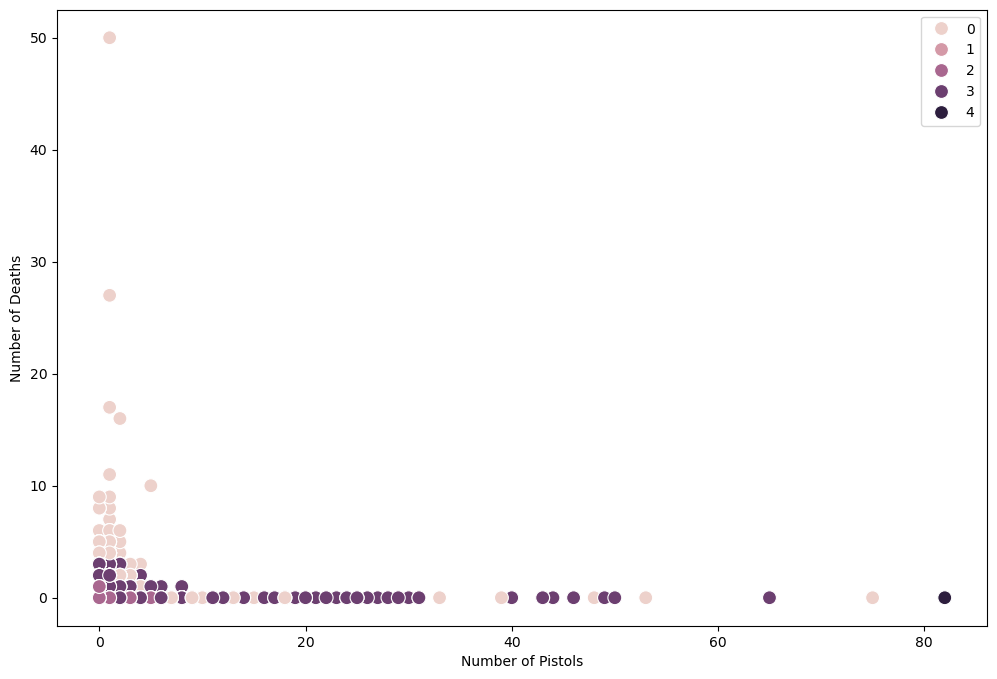

In [36]:
# Plot the clusters for the "pistol_count" and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['pistol_count'], y=subset_df2['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Pistols') # Label x-axis.
plt.ylabel('Number of Deaths') # Label y-axis.
plt.show()

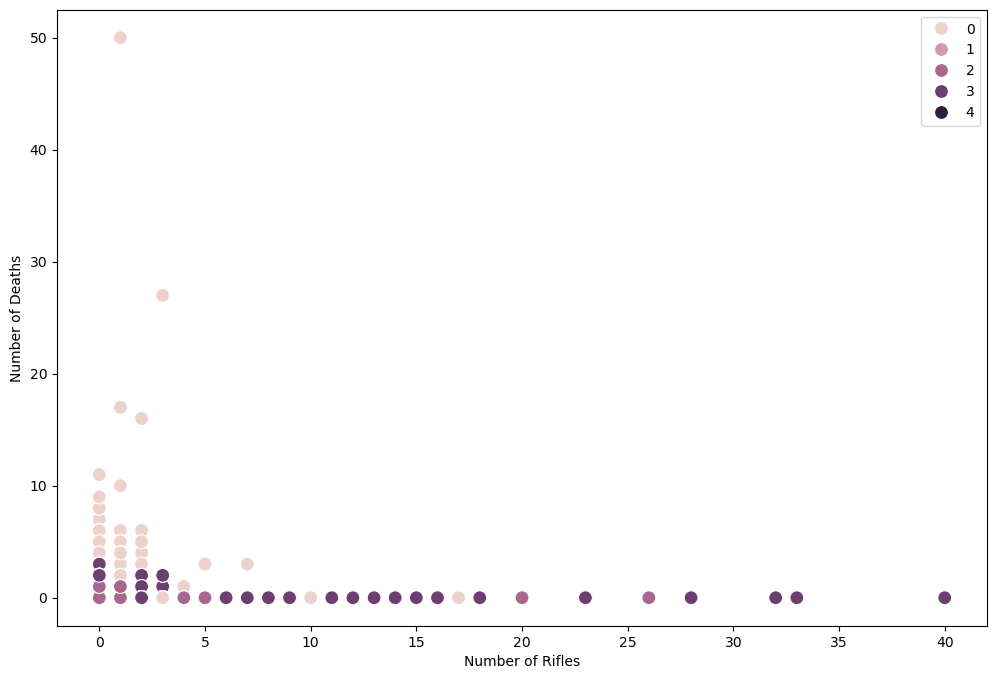

In [37]:
# Plot the clusters for the "rifle_count" and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['rifle_count'], y=subset_df2['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Rifles') # Label x-axis.
plt.ylabel('Number of Deaths') # Label y-axis.
plt.show()

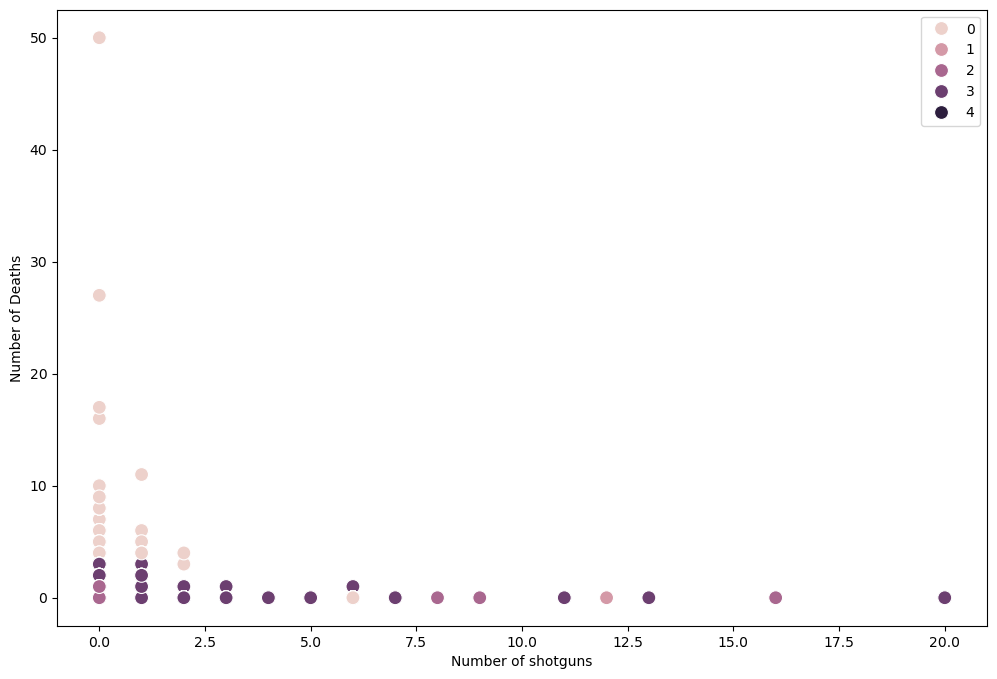

In [38]:
# Plot the clusters for the "shotgun_count" and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['shotgun_count'], y=subset_df2['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of shotguns') # Label x-axis.
plt.ylabel('Number of Deaths') # Label y-axis.
plt.show()

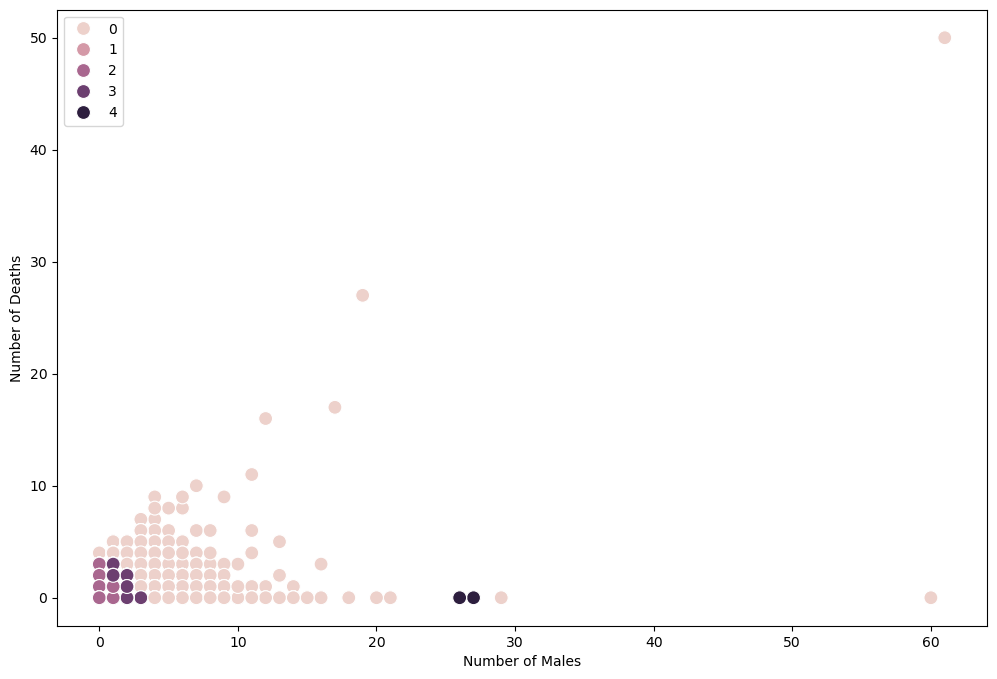

In [39]:
# Plot the clusters for the "n_killed" and "male_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset_df2['male_count'], y=subset_df2['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Males') # Label x-axis.
plt.ylabel('Number of Deaths') # Label y-axis.
plt.show()

In [40]:
subset_df2.loc[subset_df2['clusters'] == 4, 'cluster'] = 'dark purple'
subset_df2.loc[subset_df2['clusters'] == 3, 'cluster'] = 'purple'
subset_df2.loc[subset_df2['clusters'] == 2, 'cluster'] = 'pink'
subset_df2.loc[subset_df2['clusters'] == 1, 'cluster'] = 'salmon'
subset_df2.loc[subset_df2['clusters'] == 0, 'cluster'] = 'light pink'

In [41]:
subset_df2.columns

Index(['n_killed', 'n_injured', 'victim_count', 'suspect_count', 'male_count',
       'female_count', 'child_count', 'teen_count', 'adult_count',
       'pistol_count', 'rifle_count', 'shotgun_count', 'unknown_gun_count',
       'clusters', 'cluster'],
      dtype='object')

In [42]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [43]:
subset_df2.groupby('cluster').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'victim_count':['mean', 'median'],
                          'suspect_count':['mean', 'median'],
                           'male_count':['mean', 'median'],
                            'female_count':['mean', 'median'],
                                'child_count':['mean', 'median'],
                                   'teen_count':['mean', 'median'],
                                       'pistol_count':['mean', 'median'],
                                           'rifle_count':['mean', 'median'],
                                           'shotgun_count':['mean', 'median'],
                                               'unknown_gun_count':['mean', 'median']})

n_killed        n_injured        victim_count         \
                 mean median      mean median         mean median   
cluster                                                             
dark purple  0.037975    0.0  0.009494    0.0     0.072785    0.0   
light pink   0.444975    0.0  0.959701    1.0     1.676711    1.0   
pink         0.191445    0.0  0.489272    0.0     0.706643    1.0   
purple       0.259267    0.0  0.383637    0.0     0.678897    1.0   
salmon       0.000000    0.0  0.000000    0.0     0.000000    0.0   

            suspect_count        male_count        female_count         \
                     mean median       mean median         mean median   
cluster                                                                  
dark purple      1.765823    1.0   1.465190    1.0     0.145570    0.0   
light pink       2.232921    2.0   3.211982    3.0     0.450435    0.0   
pink             0.128769    0.0   0.573314    1.0     0.098444    0.0   
purple           1.107130    1.0   1.450020    1.0     0.185848    0.0   
salmon           0.190476    0.0   0.190476    0.0     0.000000    0.0   

            child_count        teen_count        pistol_count         \
                   mean median       mean median         mean median   
cluster                                                                
dark purple    0.003165    0.0   0.041139    0.0     0.449367    0.0   
light pink     0.043280    0.0   0.216328    0.0     0.221715    0.0   
pink           0.016586    0.0   0.091068    0.0     0.096660    0.0   
purple         0.015280    0.0   0.093918    0.0     0.241677    0.0   
salmon         0.000000    0.0   0.000000    0.0     0.000000    0.0   

            rifle_count        shotgun_count        unknown_gun_count         
                   mean median          mean median              mean median  
cluster                                                                       
dark purple    0.158228    0.0      0.066456    0.0         42.427215   34.0  
light pink     0.051972    0.0      0.024100    0.0          0.476151    0.0  
pink           0.023962    0.0      0.012046    0.0          0.461772    0.0  
purple         0.067896    0.0      0.034096    0.0          0.473338    0.0  
salmon         0.095238    0.0      0.571429    0.0        298.952381  300.0